In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
x_r = x.reshape(-1, 1)
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

[[-2.2]
 [-1.4]
 [-0.8]
 [ 0.2]
 [ 0.4]
 [ 0.8]
 [ 1.2]
 [ 2.2]
 [ 2.9]
 [ 4.6]]


In [10]:
logr = LogisticRegression(solver='lbfgs')
logr.fit(x_r, y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329


### Distribution

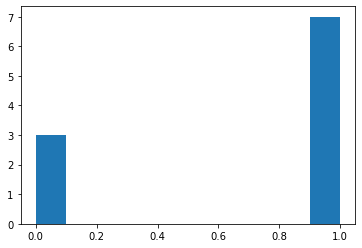

In [15]:
plt.hist(y, density = True)
plt.show()

### Gibbs-Entropy

In [49]:
X = {}
for yi in y:
    if yi in X.keys():
        X[yi] += 1
    else:
        X[yi] = 1
        
X = {k: v/sum(X.values()) for k, v in X.items()}

        
print('Distribution of classes', X)
S = - sum([ yi*math.log(yi) for yi in list(X.values()) ])
print('Gibbs Entropy', S)

Distribution of classes {0.0: 0.3, 1.0: 0.7}
Gibbs Entropy 0.6108643020548935


### Cross-Entropy

In [62]:
H = -1/len(y) * sum([ y[i]*math.log(y_pred[i]) + (1-y[i])*math.log(1- y_pred[i]) for i in range(len(y))  ])

print('Cross Entropy', H)

Cross Entropy 0.3329129870740798
